# 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 전세사기 데이터

## 데이터 불러오기

In [12]:
fraud = pd.read_excel("C:/Users/이수현/Desktop/최종/제출용/진짜 제출용/전세사기raw데이터.xlsx")

In [13]:
fraud.head(2)

,아파트명(사기O),전용면적\n(m^2),첫 전세계약\n 시점,매매가_new,전세가_new,전세가율_new\n(=전세/매매),임의경매\n개시결정,강제경매\n개시결정,시공일자,가압류,...,압류,소유권이전 \n담보가등기,소유권\n 이전등기,신탁,소유권\n 이전,임차권등기명령,공동소유자,근저당\n (기간내),근저당(정규화)\n new,지역
0,삼성쉐르빌,29.98,Sep-20,2.69,2.6,0.966543,2021-11-03,NaT,2020-06-26,0,...,0,0,0,0,0,0,0,1.95,1.691450,서울 강서구 화곡동 379-42
1,혜성팰리스,48.20,Oct-20,3.30,3.3,1.000000,NaT,2022-01-11,2008-12-19,0,...,1,0,0,0,1,1,0,0.70,1.212121,서울 강서구 화곡동 930-1


## 열이름 바꾸기

In [14]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   아파트명(사기O)          125 non-null    object        
 1   전용면적
(m^2)         125 non-null    float64       
 2   첫 전세계약
 시점         125 non-null    object        
 3   매매가_new            125 non-null    float64       
 4   전세가_new            125 non-null    float64       
 5   전세가율_new
(=전세/매매)  125 non-null    float64       
 6   임의경매
개시결정          31 non-null     datetime64[ns]
 7   강제경매
개시결정          76 non-null     datetime64[ns]
 8   시공일자               125 non-null    datetime64[ns]
 9   가압류                125 non-null    int64         
 10  가처분                125 non-null    int64         
 11  가등기                125 non-null    int64         
 12  압류                 125 non-null    int64         
 13  소유권이전 
담보가등기       125 non-null    int64         
 14  소유권
 이전등기 

In [15]:
fraud.rename(columns = {'전용면적\n(m^2)': '전용면적'} , inplace=True)
fraud.rename(columns = {'첫 전세계약\n 시점': '첫전세계약시점'} , inplace=True)
fraud.rename(columns = {'전세가율_new\n(=전세/매매)': '전세가율'} , inplace=True)
fraud.rename(columns = {'임의경매\n개시결정': '임의경매개시'} , inplace=True)
fraud.rename(columns = {'강제경매\n개시결정': '강제경매개시'} , inplace=True)
fraud.rename(columns = {'소유권이전 \n담보가등기': '소유권이전담보가등기'} , inplace=True)
fraud.rename(columns = {'소유권\n 이전등기': '소유권이전등기'} , inplace=True)
fraud.rename(columns = {'근저당\n (기간내)': '근저당'} , inplace=True)
fraud.rename(columns = {'근저당(정규화)\n new': '근저당정규화'} , inplace=True)
fraud.rename(columns = {'소유권\n 이전횟수': '소유권이전횟수'} , inplace=True)
fraud.rename(columns = {'소유권\n 이전': '소유권이전횟수'} , inplace=True)

## 시공일자 년도 추출하기 위한 코드작성

In [16]:
fraud['시공일자_datetime'] = pd.to_datetime(fraud['시공일자'])
fraud['시공일자_년도'] = fraud['시공일자_datetime'].dt.year

In [17]:
fraud.head(2)

,아파트명(사기O),전용면적,첫전세계약시점,매매가_new,전세가_new,전세가율,임의경매개시,강제경매개시,시공일자,가압류,...,소유권이전등기,신탁,소유권이전횟수,임차권등기명령,공동소유자,근저당,근저당정규화,지역,시공일자_datetime,시공일자_년도
0,삼성쉐르빌,29.98,Sep-20,2.69,2.6,0.966543,2021-11-03,NaT,2020-06-26,0,...,0,0,0,0,0,1.95,1.691450,서울 강서구 화곡동 379-42,2020-06-26,2020
1,혜성팰리스,48.20,Oct-20,3.30,3.3,1.000000,NaT,2022-01-11,2008-12-19,0,...,0,0,1,1,0,0.70,1.212121,서울 강서구 화곡동 930-1,2008-12-19,2008


## 필요한 열만 남기고 열 제거하기(1차)

In [18]:
fraud = fraud.drop(['전용면적'], axis = 1)
fraud = fraud.drop(['첫전세계약시점'], axis = 1)
fraud = fraud.drop(['임의경매개시'], axis = 1)
fraud = fraud.drop(['강제경매개시'], axis = 1)
fraud = fraud.drop(['가처분'], axis = 1)
fraud = fraud.drop(['가등기'], axis = 1)
fraud = fraud.drop(['소유권이전담보가등기'], axis = 1)
fraud = fraud.drop(['소유권이전등기'], axis = 1)

In [19]:
#'소유권이전횟수' 열 이름 '소유권이전'으로 바꾸기
fraud.rename(columns = {'소유권이전횟수': '소유권이전'} , inplace=True)

In [20]:
#null값이 있는 열 파악
fraud.isnull().any()

아파트명(사기O)        False
매매가_new          False
전세가_new          False
전세가율             False
시공일자             False
가압류              False
압류               False
신탁               False
소유권이전            False
임차권등기명령          False
공동소유자            False
근저당              False
근저당정규화           False
지역               False
시공일자_datetime    False
시공일자_년도          False
dtype: bool

In [21]:
fraud

,아파트명(사기O),매매가_new,전세가_new,전세가율,시공일자,가압류,압류,신탁,소유권이전,임차권등기명령,공동소유자,근저당,근저당정규화,지역,시공일자_datetime,시공일자_년도
0,삼성쉐르빌,2.69,2.60,0.966543,2020-06-26,0,0,0,0,0,0,1.9500,1.691450,서울 강서구 화곡동 379-42,2020-06-26,2020
1,혜성팰리스,3.30,3.30,1.000000,2008-12-19,0,1,0,1,1,0,0.7000,1.212121,서울 강서구 화곡동 930-1,2008-12-19,2008
2,밀리언하우스,3.55,3.52,0.991549,2020-07-02,1,1,0,0,0,0,2.2500,1.625352,서울 중랑구 묵동 248-32,2020-07-02,2020
3,HB엘림캐슬,1.83,2.48,1.355191,2019-03-11,0,1,0,0,1,0,2.4800,2.710383,인천 부평구 부평동 222-3,2019-03-11,2019
4,신영베르디움A동 (402호),2.55,2.55,1.000000,2019-01-18,1,1,0,0,1,0,20.4000,9.000000,서울 강서구 화곡동 372-18,2019-01-18,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,고센아트빌,1.75,1.89,1.080000,2018-04-04,1,1,0,0,1,0,11.9472,7.906971,서울 금천구 시흥동 204-4,2018-04-04,2018
121,첼시하우스5차,2.03,2.25,1.108374,2017-08-09,1,1,0,0,0,0,1.2000,1.699507,서울 금천구 시흥동 823-70,2017-08-09,2017
122,현부스카이2,2.30,2.24,0.973913,2018-08-30,1,1,0,1,1,0,0.0000,0.973913,서울 금천구 시흥동 828-4,2018-08-30,2018
123,힐사이드,1.67,1.80,1.077844,2017-05-08,1,1,0,0,1,0,0.0000,1.077844,서울 금천구 독산동 938-3,2017-05-08,2017


In [22]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   아파트명(사기O)      125 non-null    object        
 1   매매가_new        125 non-null    float64       
 2   전세가_new        125 non-null    float64       
 3   전세가율           125 non-null    float64       
 4   시공일자           125 non-null    datetime64[ns]
 5   가압류            125 non-null    int64         
 6   압류             125 non-null    int64         
 7   신탁             125 non-null    int64         
 8   소유권이전          125 non-null    int64         
 9   임차권등기명령        125 non-null    int64         
 10  공동소유자          125 non-null    int64         
 11  근저당            125 non-null    float64       
 12  근저당정규화         125 non-null    float64       
 13  지역             125 non-null    object        
 14  시공일자_datetime  125 non-null    datetime64[ns]
 15  시공일자_년도        125 non-

In [23]:
fraud.head()

,아파트명(사기O),매매가_new,전세가_new,전세가율,시공일자,가압류,압류,신탁,소유권이전,임차권등기명령,공동소유자,근저당,근저당정규화,지역,시공일자_datetime,시공일자_년도
0,삼성쉐르빌,2.69,2.60,0.966543,2020-06-26,0,0,0,0,0,0,1.95,1.691450,서울 강서구 화곡동 379-42,2020-06-26,2020
1,혜성팰리스,3.30,3.30,1.000000,2008-12-19,0,1,0,1,1,0,0.70,1.212121,서울 강서구 화곡동 930-1,2008-12-19,2008
2,밀리언하우스,3.55,3.52,0.991549,2020-07-02,1,1,0,0,0,0,2.25,1.625352,서울 중랑구 묵동 248-32,2020-07-02,2020
3,HB엘림캐슬,1.83,2.48,1.355191,2019-03-11,0,1,0,0,1,0,2.48,2.710383,인천 부평구 부평동 222-3,2019-03-11,2019
4,신영베르디움A동 (402호),2.55,2.55,1.000000,2019-01-18,1,1,0,0,1,0,20.40,9.000000,서울 강서구 화곡동 372-18,2019-01-18,2019


## 필요한 열만 남기고 열 제거하기 (2차)

In [24]:
fraud = fraud.drop(['공동소유자'], axis = 1)
fraud = fraud.drop(['지역'], axis = 1)

In [25]:
fraud

,아파트명(사기O),매매가_new,전세가_new,전세가율,시공일자,가압류,압류,신탁,소유권이전,임차권등기명령,근저당,근저당정규화,시공일자_datetime,시공일자_년도
0,삼성쉐르빌,2.69,2.60,0.966543,2020-06-26,0,0,0,0,0,1.9500,1.691450,2020-06-26,2020
1,혜성팰리스,3.30,3.30,1.000000,2008-12-19,0,1,0,1,1,0.7000,1.212121,2008-12-19,2008
2,밀리언하우스,3.55,3.52,0.991549,2020-07-02,1,1,0,0,0,2.2500,1.625352,2020-07-02,2020
3,HB엘림캐슬,1.83,2.48,1.355191,2019-03-11,0,1,0,0,1,2.4800,2.710383,2019-03-11,2019
4,신영베르디움A동 (402호),2.55,2.55,1.000000,2019-01-18,1,1,0,0,1,20.4000,9.000000,2019-01-18,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,고센아트빌,1.75,1.89,1.080000,2018-04-04,1,1,0,0,1,11.9472,7.906971,2018-04-04,2018
121,첼시하우스5차,2.03,2.25,1.108374,2017-08-09,1,1,0,0,0,1.2000,1.699507,2017-08-09,2017
122,현부스카이2,2.30,2.24,0.973913,2018-08-30,1,1,0,1,1,0.0000,0.973913,2018-08-30,2018
123,힐사이드,1.67,1.80,1.077844,2017-05-08,1,1,0,0,1,0.0000,1.077844,2017-05-08,2017


## null값이 있는지 확인

In [26]:
fraud.isnull().any()

아파트명(사기O)        False
매매가_new          False
전세가_new          False
전세가율             False
시공일자             False
가압류              False
압류               False
신탁               False
소유권이전            False
임차권등기명령          False
근저당              False
근저당정규화           False
시공일자_datetime    False
시공일자_년도          False
dtype: bool

## 이상치 제거

In [27]:
fraud.describe()

,매매가_new,전세가_new,전세가율,시공일자,가압류,압류,신탁,소유권이전,임차권등기명령,근저당,근저당정규화,시공일자_datetime,시공일자_년도
count,125.000000,125.000000,125.000000,125,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125,125.000000
mean,1.916584,1.858960,0.960708,2015-01-08 05:34:04.800000,0.52000,0.656000,0.024000,0.112000,0.624000,2.391166,2.165323,2015-01-08 05:34:04.800000,2014.552000
min,0.550000,0.250000,0.374332,1991-05-20 00:00:00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.851624,1991-05-20 00:00:00,1991.000000
25%,1.500000,1.420000,0.847518,2014-09-29 00:00:00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2014-09-29 00:00:00,2014.000000
50%,1.900000,1.990000,1.000000,2017-06-30 00:00:00,1.00000,1.000000,0.000000,0.000000,1.000000,0.120000,1.279762,2017-06-30 00:00:00,2017.000000
75%,2.240000,2.300000,1.066667,2018-08-27 00:00:00,1.00000,1.000000,0.000000,0.000000,1.000000,1.340000,1.642857,2018-08-27 00:00:00,2018.000000
max,3.600000,3.600000,2.161017,2020-07-02 00:00:00,1.00000,1.000000,1.000000,1.000000,1.000000,60.000000,25.448980,2020-07-02 00:00:00,2020.000000
std,0.588376,0.737486,0.269139,NaN,0.50161,0.476953,0.153665,0.316636,0.486329,7.025517,3.171365,NaN,6.503666


In [28]:
# 한글 폰트 적용
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic",
rc={"axes.unicode_minus":False}, style='white')

In [29]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   아파트명(사기O)      125 non-null    object        
 1   매매가_new        125 non-null    float64       
 2   전세가_new        125 non-null    float64       
 3   전세가율           125 non-null    float64       
 4   시공일자           125 non-null    datetime64[ns]
 5   가압류            125 non-null    int64         
 6   압류             125 non-null    int64         
 7   신탁             125 non-null    int64         
 8   소유권이전          125 non-null    int64         
 9   임차권등기명령        125 non-null    int64         
 10  근저당            125 non-null    float64       
 11  근저당정규화         125 non-null    float64       
 12  시공일자_datetime  125 non-null    datetime64[ns]
 13  시공일자_년도        125 non-null    int32         
dtypes: datetime64[ns](2), float64(5), int32(1), int64(5), object(1)
memory usa

## 전세가율 boxplot

<Axes: >

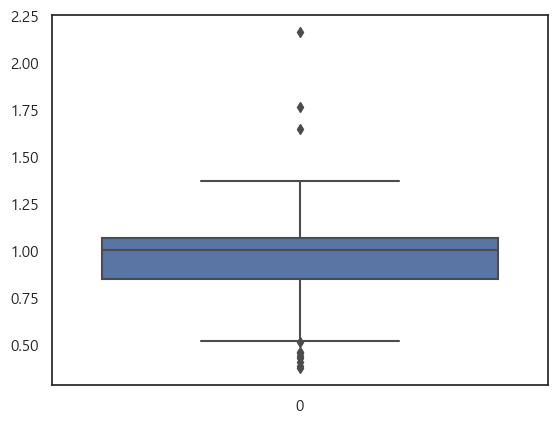

In [30]:
#boxplot 그리기
sns.boxplot(data=fraud['전세가율'])

### 인덱스 추가 for 이상치 제거

In [31]:
#인덱스 설정하기
index_list = list(range(1, 126, 1))

fraud.insert(0, 'index', index_list)

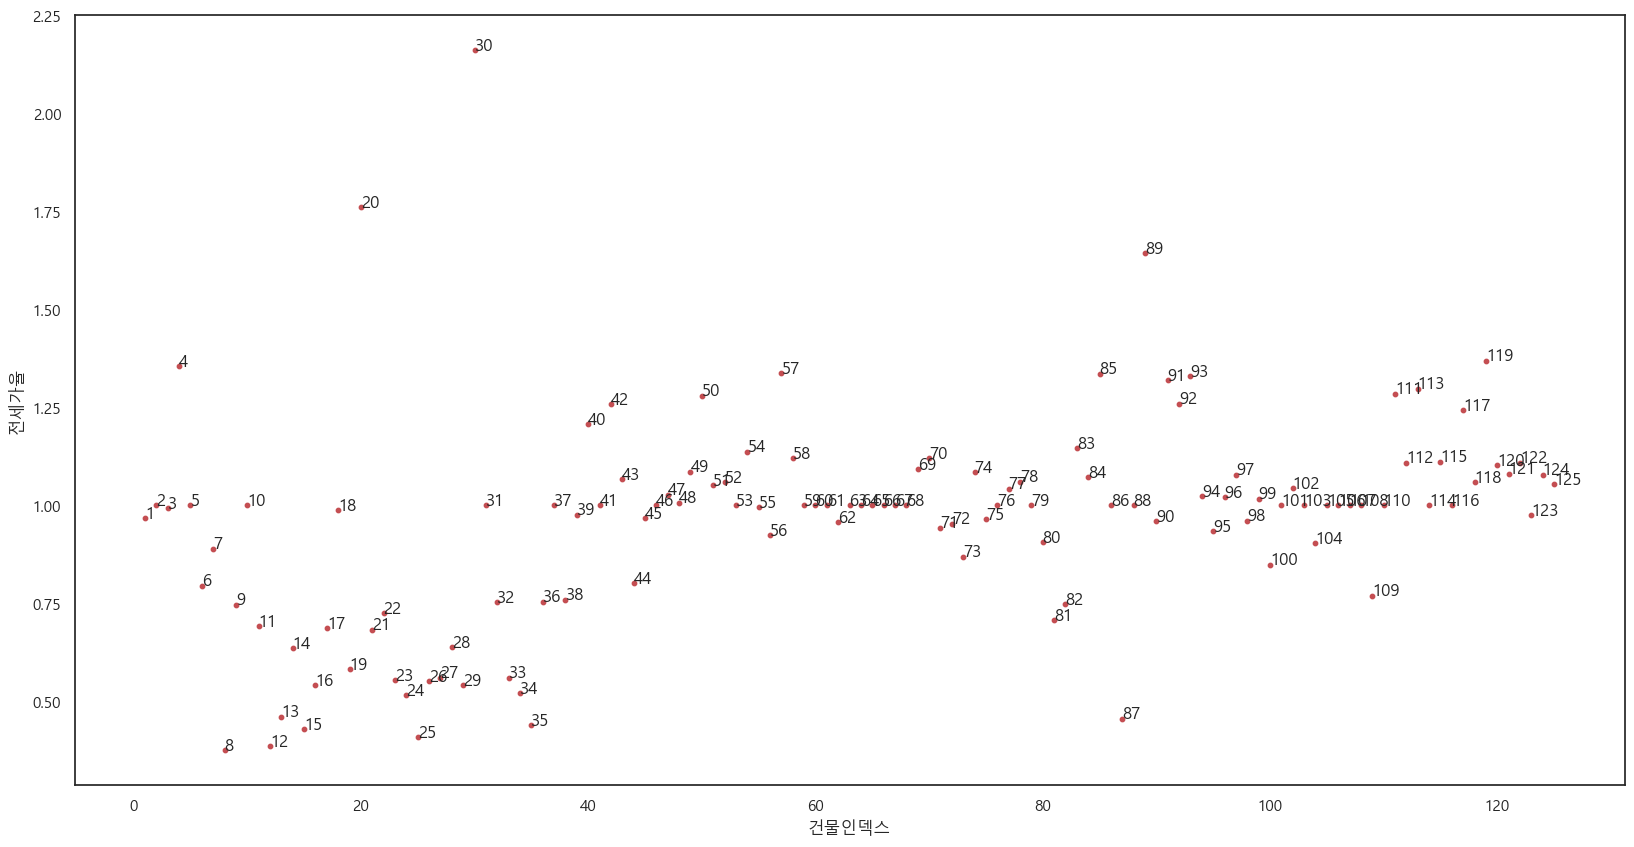

In [32]:
plt.figure(figsize=(20, 10))
plt.scatter(fraud['index'], fraud['전세가율'], color = 'r', s = 10)
plt.xlabel('건물인덱스')
plt.ylabel('전세가율')

for i in range(len(fraud)): # 행 개수만큼
    row = fraud.iloc[i] # 한 행씩 꺼내기
    id = row['index'] # index열
    x = row['index'] # x좌표가 저장된 열
    y = row['전세가율'] # y좌표가 저장된 열

    plt.text(x, y, id) # x 좌표, y좌표, 이름 순서로 input 지정

plt.show()

In [33]:
#사기데이터의 인덱스를 내가 임시로 만든 index열로 지정함
fraud.index = fraud['index']

#이상치로 의심되는값 살펴보기
fraud.loc[[20, 30, 87, 89]]

,index,아파트명(사기O),매매가_new,전세가_new,전세가율,시공일자,가압류,압류,신탁,소유권이전,임차권등기명령,근저당,근저당정규화,시공일자_datetime,시공일자_년도
index,,,,,,,,,,,,,,,
20,20,토브하우스(304호),1.13,1.99,1.761062,2018-09-05,0,0,0,1,1,0.0000,1.761062,2018-09-05,2018
30,30,토브하우스(502호),1.18,2.55,2.161017,2018-09-23,0,1,1,1,1,0.0000,2.161017,2018-09-23,2018
87,87,동방빌라,0.55,0.25,0.454545,1991-05-20,1,1,0,1,0,0.5775,1.504545,1991-05-20,1991
89,89,신의쉐르빌,1.40,2.30,1.642857,2016-09-21,1,1,0,0,1,0.0000,1.642857,2016-09-21,2016


In [34]:
#이상치로 판단할 수 있으나 data 양 부족으로 의미있는 데이터로 남겨두기로 결정.

In [35]:
#이외에도 이상치로 판단할 수 있는 data들을 잘못된 데이터가 아닌 이상 의미있는 데이터로 남겨두기로 결정함.

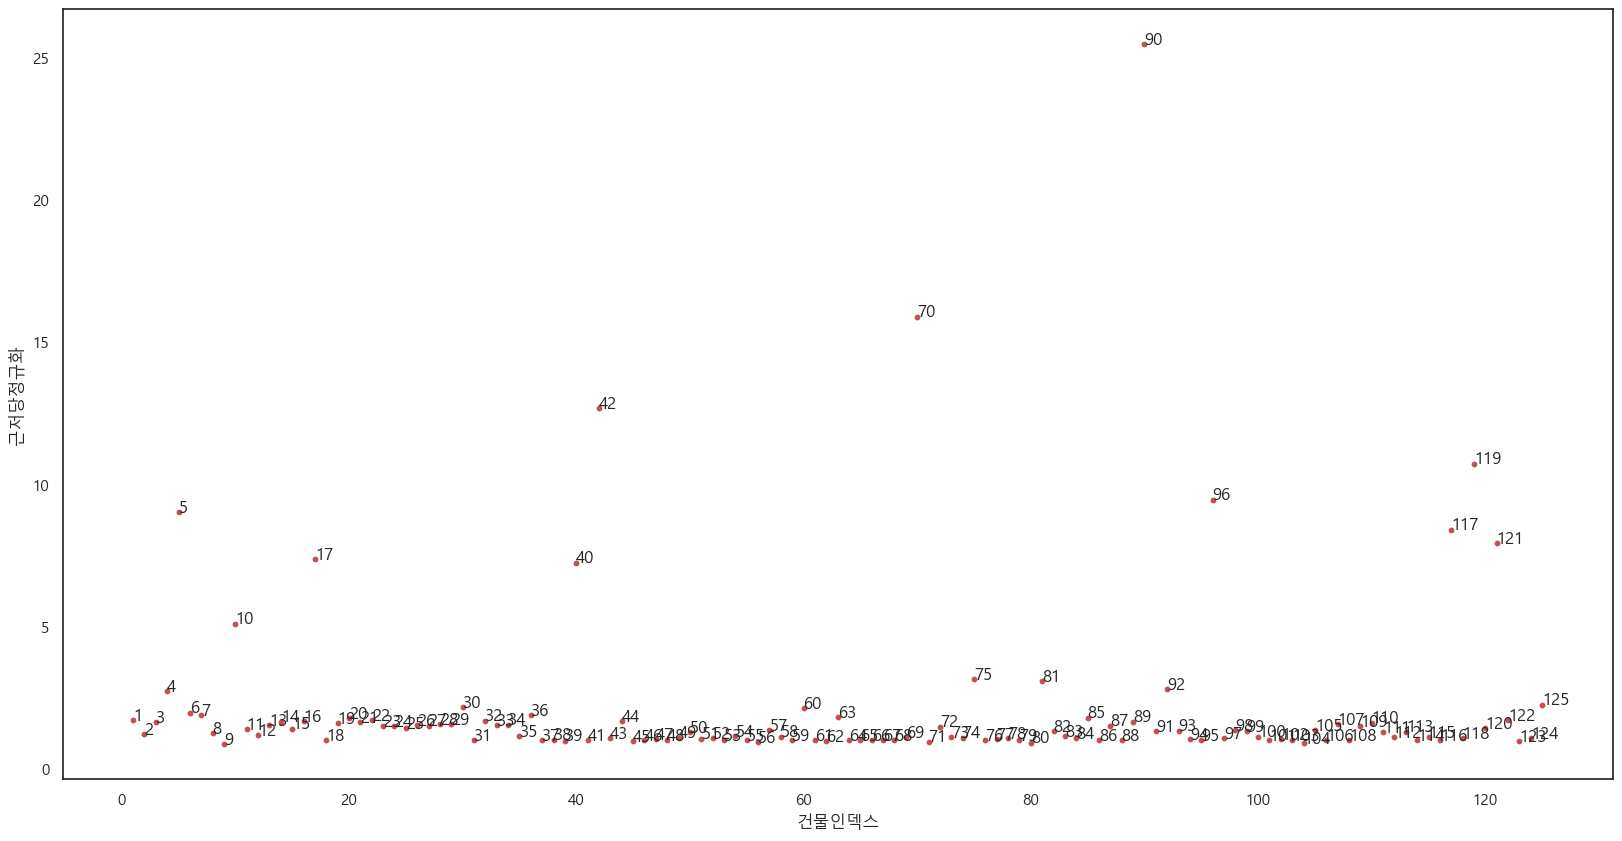

In [36]:
plt.figure(figsize=(20, 10))
plt.scatter(fraud['index'], fraud['근저당정규화'], color = 'r', s = 10)
plt.xlabel('건물인덱스')
plt.ylabel('근저당정규화')

for i in range(len(fraud)): # 행 개수만큼
    row = fraud.iloc[i] # 한 행씩 꺼내기
    id = row['index'] # index열
    x = row['index'] # x좌표가 저장된 열
    y = row['근저당정규화'] # y좌표가 저장된 열

    plt.text(x, y, id) # x 좌표, y좌표, 이름 순서로 input 지정

plt.show()

## 필요한 열만 남기고 열 제거하기(3차)

In [37]:
fraud.head()

,index,아파트명(사기O),매매가_new,전세가_new,전세가율,시공일자,가압류,압류,신탁,소유권이전,임차권등기명령,근저당,근저당정규화,시공일자_datetime,시공일자_년도
index,,,,,,,,,,,,,,,
1,1,삼성쉐르빌,2.69,2.60,0.966543,2020-06-26,0,0,0,0,0,1.95,1.691450,2020-06-26,2020
2,2,혜성팰리스,3.30,3.30,1.000000,2008-12-19,0,1,0,1,1,0.70,1.212121,2008-12-19,2008
3,3,밀리언하우스,3.55,3.52,0.991549,2020-07-02,1,1,0,0,0,2.25,1.625352,2020-07-02,2020
4,4,HB엘림캐슬,1.83,2.48,1.355191,2019-03-11,0,1,0,0,1,2.48,2.710383,2019-03-11,2019
5,5,신영베르디움A동 (402호),2.55,2.55,1.000000,2019-01-18,1,1,0,0,1,20.40,9.000000,2019-01-18,2019


In [38]:
fraud = fraud.drop('index', axis = 1)

## 레이블 설정
* label = 1 : 전세사기인 경우
* label = 0 : 전세사기가 아닌 경우

In [39]:
a = []

##사기 매물의 데이터가 125개이기에 125로 지정.
for i in range(125):
  a.append(1)


fraud['label'] = a

# 전세사기가 아닌 경우

## 데이터 불러오기

In [40]:
nfraud = pd.read_excel("C:/Users/이수현/Desktop/최종/제출용/진짜 제출용/전세사기아닌raw데이터.xlsx")

In [41]:
nfraud.head()

,아파트명(사기X),전용면적\n(m^2),매매가(억),전세가(억),전세가율,매매계약일,전세계약일,시공일자,가압류,가처분,...,신탁,소유권이전,임차권등기명령,공동소유자,근저당,근저당(정규화) new,지역,동,층수,주소
0,경남아너스빌,59,6.80,4.3,0.632353,2020-11-26,2021-01-23,2003-06-20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시 강북구 미아동,101,10,서울특별시 강북구 미아동 1356
1,경남아너스빌,59,5.18,3.1,0.598456,2018-10-17,2018-12-17,2003-06-20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시 강북구 미아동,101,10,서울특별시 강북구 미아동 1356
2,미아한일유앤아이,84,NaN,3.9,NaN,NaN,2020-02-21,2002-11-29,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시 강북구 미아동,103,2,서울시 강북구 월계로21가길 41
3,미아한일유앤아이,84,4.13,3.0,0.726392,2018-06-05,2018-06-08,2002-11-29,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.726392,서울특별시 강북구 미아동,103,2,서울시 강북구 월계로21가길 41
4,길음뉴타운9단지래미안,84,NaN,4.8,NaN,NaN,2016-01-25,2010-09-30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시 강북구 길음동,908,3,서울특별시 성북구 길음로9길 50


In [42]:
nfraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   아파트명(사기X)     356 non-null    object 
 1   전용면적
(m^2)    356 non-null    object 
 2   매매가(억)        354 non-null    float64
 3   전세가(억)        356 non-null    float64
 4   전세가율          354 non-null    float64
 5   매매계약일         354 non-null    object 
 6   전세계약일         356 non-null    object 
 7   시공일자          356 non-null    object 
 8   가압류           178 non-null    float64
 9   가처분           179 non-null    object 
 10  가등기           178 non-null    float64
 11  압류            178 non-null    float64
 12  소유권이전 
담보가등기  178 non-null    float64
 13  소유권
 이전등기     178 non-null    float64
 14  신탁            178 non-null    float64
 15  소유권이전         178 non-null    float64
 16  임차권등기명령       178 non-null    float64
 17  공동소유자         178 non-null    float64
 18  근저당           181 non-null    

## 이름 바꾸기

In [43]:
nfraud.rename(columns = {'전용면적\n(m^2)': '전용면적'} , inplace=True)
nfraud.rename(columns = {'근저당(정규화) new': '근저당정규화'} , inplace=True)
nfraud.rename(columns = {'소유권이전 \n담보가등기': '소유권이전담보가등기'} , inplace=True)
nfraud.rename(columns = {'소유권\n 이전등기': '소유권이전등기'} , inplace=True)

## 필요 없는 열 제거 (1차)

In [44]:
nfraud = nfraud.drop(['전용면적'], axis = 1)
nfraud = nfraud.drop(['가처분'], axis = 1)
nfraud = nfraud.drop(['가등기'], axis = 1)
nfraud = nfraud.drop(['소유권이전담보가등기'], axis = 1)
nfraud = nfraud.drop(['소유권이전등기'], axis = 1)
nfraud = nfraud.drop(['동'], axis = 1)
nfraud = nfraud.drop(['층수'], axis = 1)
nfraud = nfraud.drop(['주소'], axis = 1)
nfraud = nfraud.drop(['매매계약일'], axis = 1)
nfraud = nfraud.drop(['전세계약일'], axis = 1)
nfraud = nfraud.drop(['공동소유자'], axis = 1)
nfraud = nfraud.drop(['지역'], axis = 1)

In [45]:
nfraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   아파트명(사기X)  356 non-null    object 
 1   매매가(억)     354 non-null    float64
 2   전세가(억)     356 non-null    float64
 3   전세가율       354 non-null    float64
 4   시공일자       356 non-null    object 
 5   가압류        178 non-null    float64
 6   압류         178 non-null    float64
 7   신탁         178 non-null    float64
 8   소유권이전      178 non-null    float64
 9   임차권등기명령    178 non-null    float64
 10  근저당        181 non-null    float64
 11  근저당정규화     319 non-null    float64
dtypes: float64(10), object(2)
memory usage: 33.5+ KB


## 전세가율에 있는 #DIV/0!있는 행 없애기

In [46]:
idx = nfraud[nfraud['전세가율'] == "#DIV/0!"].index
nfraud.drop(idx , inplace=True)

In [47]:
nfraud.isnull().any()

아파트명(사기X)    False
매매가(억)        True
전세가(억)       False
전세가율          True
시공일자         False
가압류           True
압류            True
신탁            True
소유권이전         True
임차권등기명령       True
근저당           True
근저당정규화        True
dtype: bool

## 근저당 값이 없는 데이터 행 삭제

In [48]:
idx = nfraud[nfraud['근저당'].isnull() == True].index
nfraud.drop(idx , inplace=True)

## 가압류 값이 채워지지 않은 데이터 행 삭제

In [49]:
idx = nfraud[nfraud['가압류'].isnull() == True].index
nfraud.drop(idx , inplace=True)

In [50]:
nfraud.isnull().any()

아파트명(사기X)    False
매매가(억)       False
전세가(억)       False
전세가율         False
시공일자         False
가압류          False
압류           False
신탁           False
소유권이전        False
임차권등기명령      False
근저당          False
근저당정규화       False
dtype: bool

In [51]:
nfraud

,아파트명(사기X),매매가(억),전세가(억),전세가율,시공일자,가압류,압류,신탁,소유권이전,임차권등기명령,근저당,근저당정규화
3,미아한일유앤아이,4.13,3.00,0.726392,2002-11-29,0.0,0.0,0.0,0.0,0.0,0.000,0.726392
5,길음뉴타운9단지래미안,5.30,5.20,0.981132,2010-09-30,0.0,0.0,0.0,0.0,0.0,0.600,1.094340
6,그린하우스,2.44,2.30,0.942623,2020-04-28 00:00:00,0.0,0.0,0.0,0.0,0.0,1.620,1.606557
8,우진명가,3.35,2.95,0.880597,2019-02-08 00:00:00,0.0,0.0,1.0,0.0,0.0,0.000,0.880597
10,궁골별장빌,2.00,2.10,1.050000,2004-03-02 00:00:00,0.0,0.0,0.0,0.0,0.0,0.000,1.050000
...,...,...,...,...,...,...,...,...,...,...,...,...
346,류한빌라,1.18,0.45,0.381356,2002-03-26 00:00:00,0.0,0.0,0.0,0.0,0.0,0.000,0.381356
348,현웅,1.90,1.40,0.736842,1991-09-18 00:00:00,0.0,0.0,0.0,0.0,0.0,0.000,0.736842
350,창영주택,1.55,0.90,0.580645,1994-11-10 00:00:00,0.0,0.0,0.0,0.0,0.0,0.000,0.580645
352,삼호아트,2.18,1.30,0.596330,1991-09-30 00:00:00,0.0,0.0,0.0,0.0,0.0,1.287,1.186697


In [52]:
nfraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 3 to 354
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   아파트명(사기X)  178 non-null    object 
 1   매매가(억)     178 non-null    float64
 2   전세가(억)     178 non-null    float64
 3   전세가율       178 non-null    float64
 4   시공일자       178 non-null    object 
 5   가압류        178 non-null    float64
 6   압류         178 non-null    float64
 7   신탁         178 non-null    float64
 8   소유권이전      178 non-null    float64
 9   임차권등기명령    178 non-null    float64
 10  근저당        178 non-null    float64
 11  근저당정규화     178 non-null    float64
dtypes: float64(10), object(2)
memory usage: 18.1+ KB


In [53]:
nfraud['시공일자_datetime'] = pd.to_datetime(nfraud['시공일자'])
nfraud['시공일자_년도'] = nfraud['시공일자_datetime'].dt.year

In [54]:
nfraud

,아파트명(사기X),매매가(억),전세가(억),전세가율,시공일자,가압류,압류,신탁,소유권이전,임차권등기명령,근저당,근저당정규화,시공일자_datetime,시공일자_년도
3,미아한일유앤아이,4.13,3.00,0.726392,2002-11-29,0.0,0.0,0.0,0.0,0.0,0.000,0.726392,2002-11-29,2002
5,길음뉴타운9단지래미안,5.30,5.20,0.981132,2010-09-30,0.0,0.0,0.0,0.0,0.0,0.600,1.094340,2010-09-30,2010
6,그린하우스,2.44,2.30,0.942623,2020-04-28 00:00:00,0.0,0.0,0.0,0.0,0.0,1.620,1.606557,2020-04-28,2020
8,우진명가,3.35,2.95,0.880597,2019-02-08 00:00:00,0.0,0.0,1.0,0.0,0.0,0.000,0.880597,2019-02-08,2019
10,궁골별장빌,2.00,2.10,1.050000,2004-03-02 00:00:00,0.0,0.0,0.0,0.0,0.0,0.000,1.050000,2004-03-02,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,류한빌라,1.18,0.45,0.381356,2002-03-26 00:00:00,0.0,0.0,0.0,0.0,0.0,0.000,0.381356,2002-03-26,2002
348,현웅,1.90,1.40,0.736842,1991-09-18 00:00:00,0.0,0.0,0.0,0.0,0.0,0.000,0.736842,1991-09-18,1991
350,창영주택,1.55,0.90,0.580645,1994-11-10 00:00:00,0.0,0.0,0.0,0.0,0.0,0.000,0.580645,1994-11-10,1994
352,삼호아트,2.18,1.30,0.596330,1991-09-30 00:00:00,0.0,0.0,0.0,0.0,0.0,1.287,1.186697,1991-09-30,1991


# 이상치 제거

In [55]:
nfraud.describe()

,매매가(억),전세가(억),전세가율,가압류,압류,신탁,소유권이전,임차권등기명령,근저당,근저당정규화,시공일자_datetime,시공일자_년도
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178,178.000000
mean,1.837565,1.415000,0.776415,0.039326,0.044944,0.016854,0.028090,0.028090,0.676697,1.317943,2003-01-03 03:54:36.404494336,2002.471910
min,0.285000,0.190000,0.171429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266667,1979-11-17 00:00:00,1979.000000
25%,1.275000,1.000000,0.673286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.729278,1999-12-30 00:00:00,1999.250000
50%,1.725000,1.300000,0.812500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.880299,2002-10-06 00:00:00,2002.000000
75%,2.200000,1.800000,0.895326,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,1.163043,2008-07-18 18:00:00,2008.000000
max,6.500000,5.200000,1.428571,1.000000,1.000000,1.000000,1.000000,1.000000,40.800000,46.333333,2020-12-30 00:00:00,2020.000000
std,0.847750,0.732241,0.201253,0.194917,0.207765,0.129087,0.165696,0.165696,3.189820,3.473979,NaN,8.172007


In [56]:
nfraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 3 to 354
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   아파트명(사기X)      178 non-null    object        
 1   매매가(억)         178 non-null    float64       
 2   전세가(억)         178 non-null    float64       
 3   전세가율           178 non-null    float64       
 4   시공일자           178 non-null    object        
 5   가압류            178 non-null    float64       
 6   압류             178 non-null    float64       
 7   신탁             178 non-null    float64       
 8   소유권이전          178 non-null    float64       
 9   임차권등기명령        178 non-null    float64       
 10  근저당            178 non-null    float64       
 11  근저당정규화         178 non-null    float64       
 12  시공일자_datetime  178 non-null    datetime64[ns]
 13  시공일자_년도        178 non-null    int32         
dtypes: datetime64[ns](1), float64(10), int32(1), object(2)
memory usage: 20.2+ KB


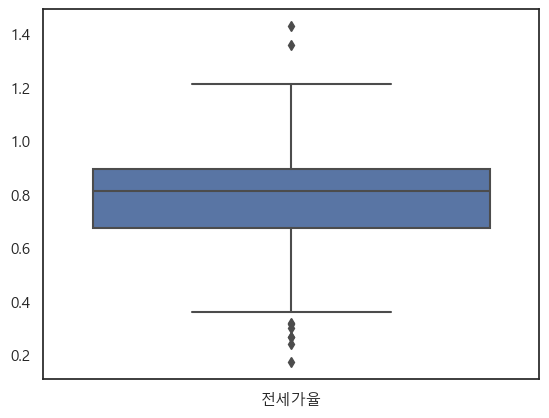

In [57]:
#boxplot 그리기
sns.boxplot(data=nfraud[['전세가율']])
plt.show()

## 인덱스 추가 for 이상치 제거

In [58]:
index_list = list(range(1, 179, 1))

nfraud.insert(0, 'index', index_list)

In [59]:
nfraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 3 to 354
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          178 non-null    int64         
 1   아파트명(사기X)      178 non-null    object        
 2   매매가(억)         178 non-null    float64       
 3   전세가(억)         178 non-null    float64       
 4   전세가율           178 non-null    float64       
 5   시공일자           178 non-null    object        
 6   가압류            178 non-null    float64       
 7   압류             178 non-null    float64       
 8   신탁             178 non-null    float64       
 9   소유권이전          178 non-null    float64       
 10  임차권등기명령        178 non-null    float64       
 11  근저당            178 non-null    float64       
 12  근저당정규화         178 non-null    float64       
 13  시공일자_datetime  178 non-null    datetime64[ns]
 14  시공일자_년도        178 non-null    int32         
dtypes: datetime64[ns](1), float6

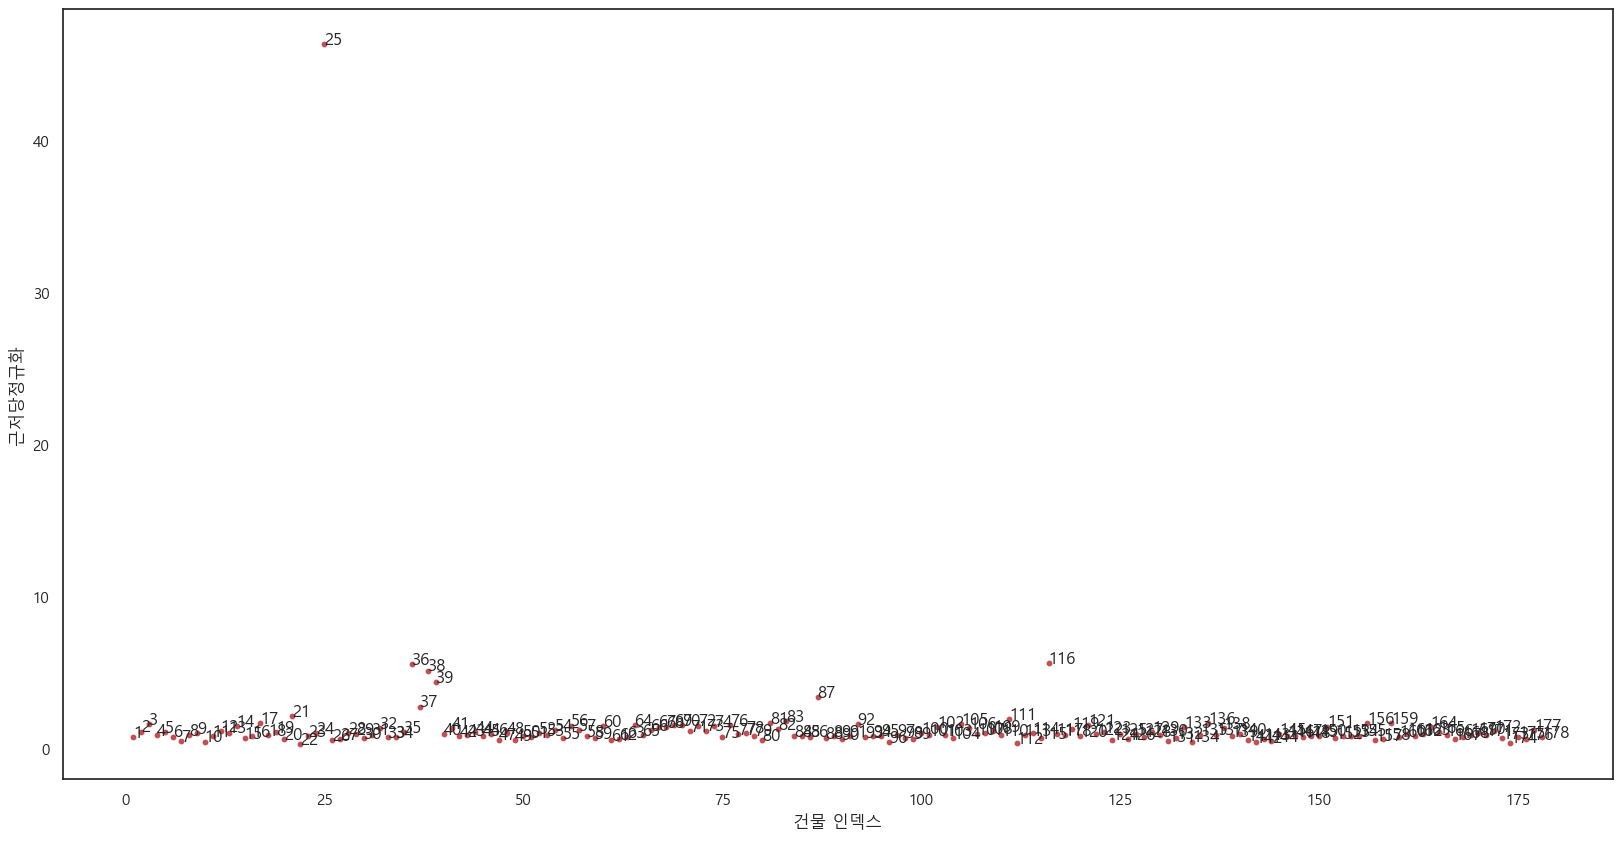

In [60]:
plt.figure(figsize=(20, 10))
plt.scatter(nfraud['index'], nfraud['근저당정규화'], color = 'r', s = 10)
plt.xlabel('건물 인덱스')
plt.ylabel('근저당정규화')

for i in range(len(nfraud)): # 행 개수만큼
    row = nfraud.iloc[i] # 한 행씩 꺼내기
    id = row['index'] # index열
    x = row['index'] # x좌표가 저장된 열
    y = row['근저당정규화'] # y좌표가 저장된 열

    plt.text(x, y, id) # x 좌표, y좌표, 이름 순서로 input 지정

plt.show()

In [61]:
#사기아닌데이터의 인덱스를 내가 임시로 만든 index열로 지정함
nfraud.index = nfraud['index']

#이상치로 의심되는 5개 값 살펴보기
nfraud.loc[[25, 36, 38, 39, 116]]

,index,아파트명(사기X),매매가(억),전세가(억),전세가율,시공일자,가압류,압류,신탁,소유권이전,임차권등기명령,근저당,근저당정규화,시공일자_datetime,시공일자_년도
index,,,,,,,,,,,,,,,
25,25,문현프라다,0.9000,0.9,1.000000,2020-10-20,0.0,0.0,0.0,0.0,0.0,40.800,46.333333,2020-10-20,2020
36,36,골든패밀리,0.4915,0.4,0.813835,2012-09-05,0.0,0.0,0.0,0.0,0.0,2.316,5.525941,2012-09-05,2012
38,38,동현빌,1.2700,1.3,1.023622,2003-06-04,0.0,0.0,0.0,0.0,0.0,5.200,5.118110,2003-06-04,2003
39,39,다모아하우스,0.9700,0.8,0.824742,2012-01-13,0.0,0.0,0.0,0.0,0.0,3.432,4.362887,2012-01-13,2012
116,116,레오팔레스,1.9200,1.8,0.937500,2014-12-09,0.0,0.0,0.0,0.0,0.0,9.000,5.625000,2014-12-09,2014


In [62]:
# 확인 결과 등기부등본에 공동담보목록이 없는 상태이기에 개별 근저당을 구할 수 없음.
##그러므로 없앱니다.
nfraud.drop([25, 36, 38, 39, 116], axis=0, inplace=True)

In [63]:
nfraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 1 to 178
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          173 non-null    int64         
 1   아파트명(사기X)      173 non-null    object        
 2   매매가(억)         173 non-null    float64       
 3   전세가(억)         173 non-null    float64       
 4   전세가율           173 non-null    float64       
 5   시공일자           173 non-null    object        
 6   가압류            173 non-null    float64       
 7   압류             173 non-null    float64       
 8   신탁             173 non-null    float64       
 9   소유권이전          173 non-null    float64       
 10  임차권등기명령        173 non-null    float64       
 11  근저당            173 non-null    float64       
 12  근저당정규화         173 non-null    float64       
 13  시공일자_datetime  173 non-null    datetime64[ns]
 14  시공일자_년도        173 non-null    int32         
dtypes: datetime64[ns](1), float6

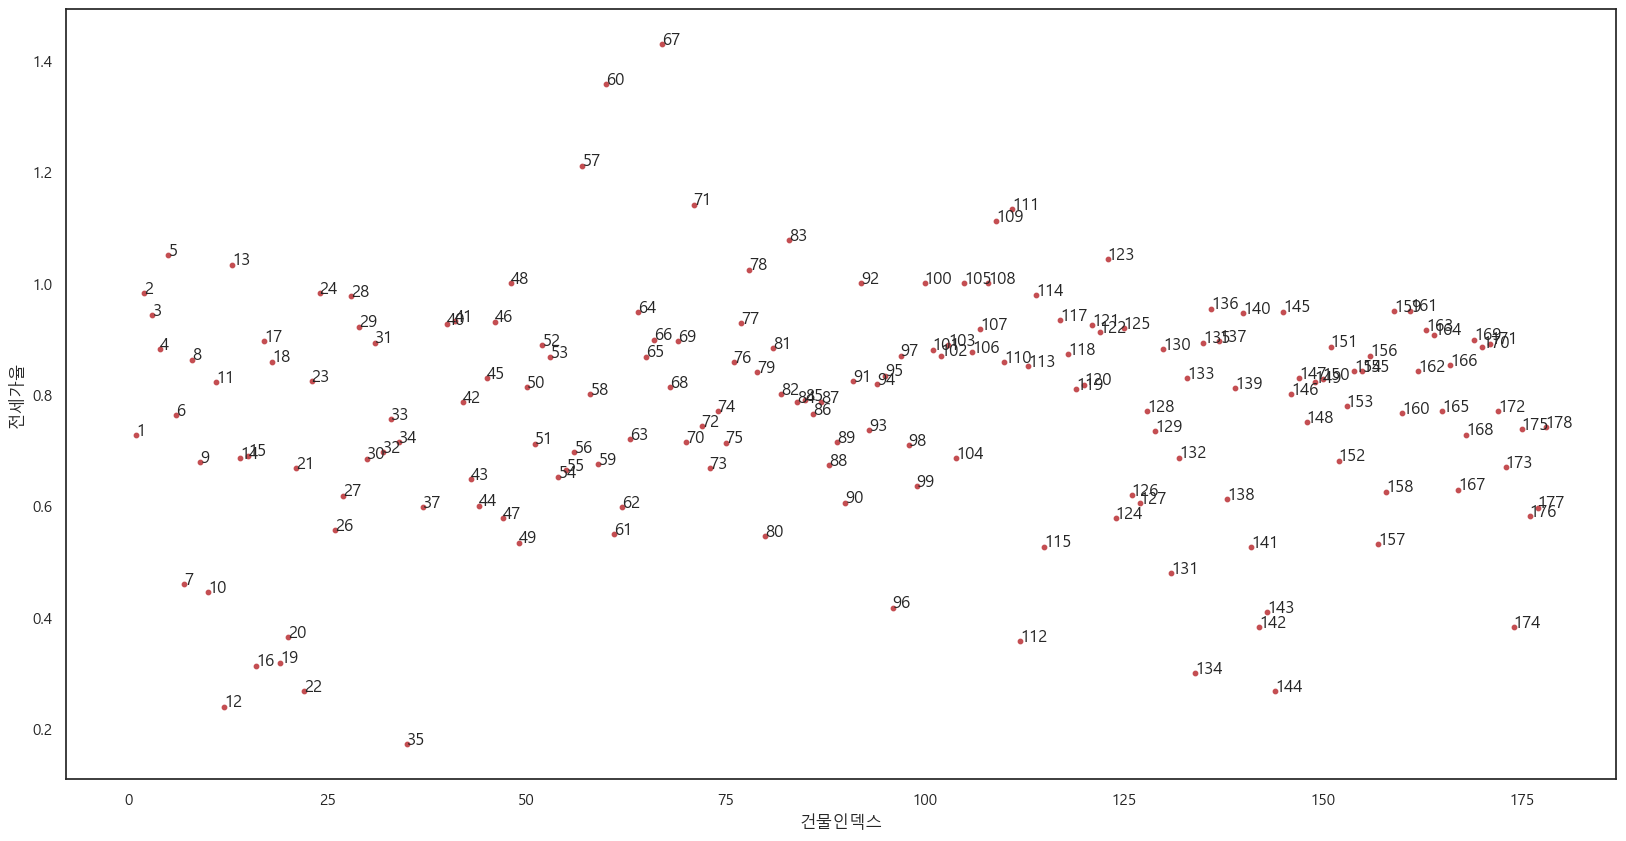

In [64]:
plt.figure(figsize=(20, 10))
plt.scatter(nfraud['index'], nfraud['전세가율'], color = 'r', s = 10)
plt.xlabel('건물인덱스')
plt.ylabel('전세가율')

for i in range(len(nfraud)): # 행 개수만큼
    row = nfraud.iloc[i] # 한 행씩 꺼내기
    id = row['index'] # index열
    x = row['index'] # x좌표가 저장된 열
    y = row['전세가율'] # y좌표가 저장된 열

    plt.text(x, y, id) # x 좌표, y좌표, 이름 순서로 input 지정

plt.show()

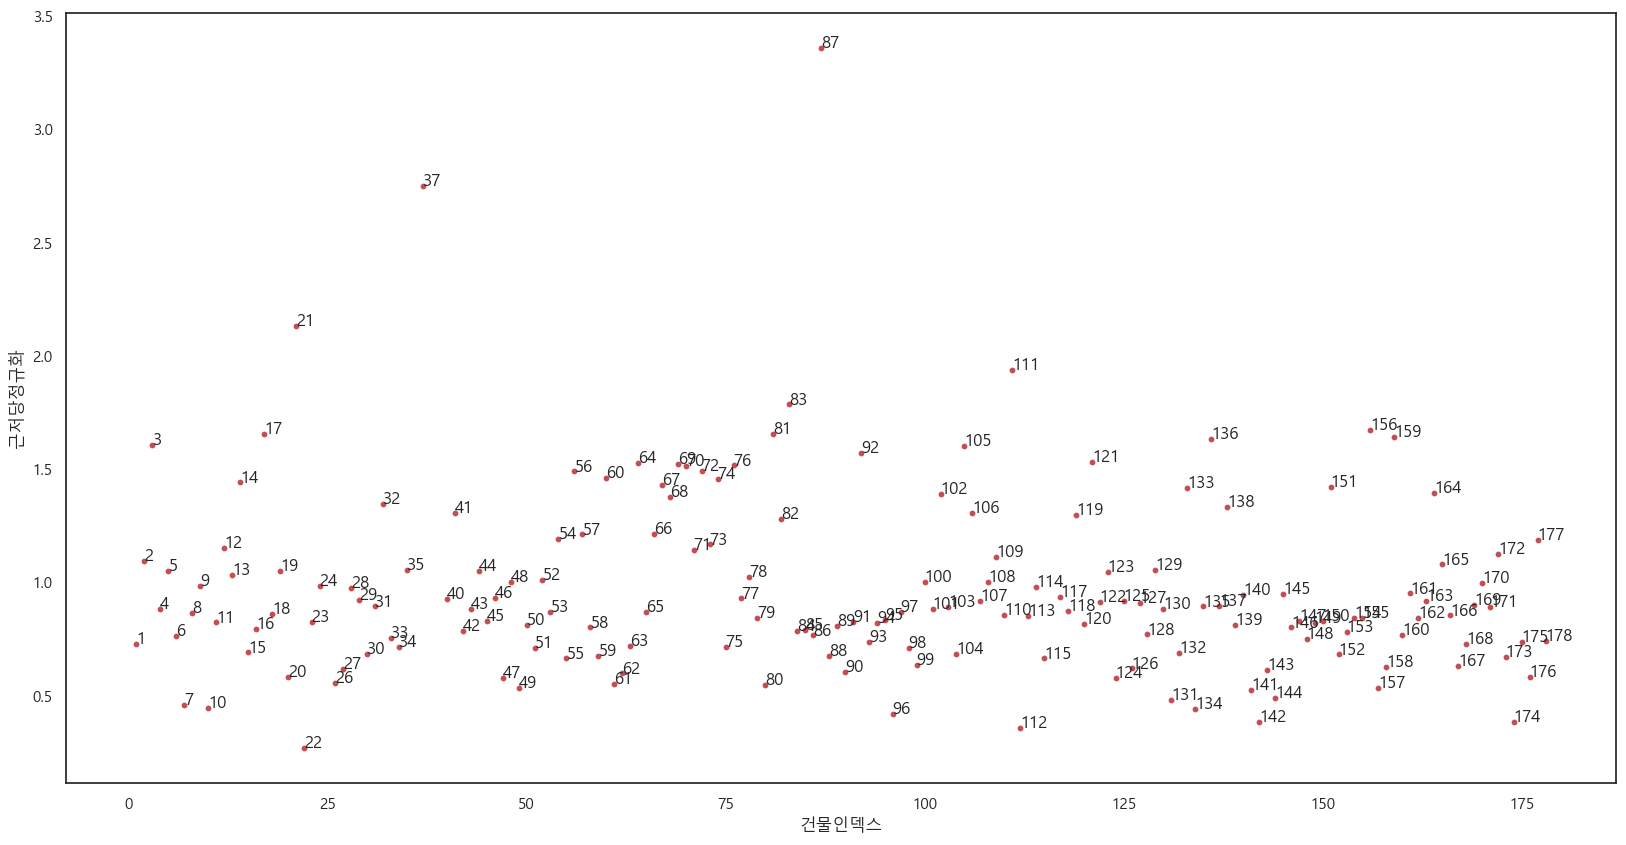

In [65]:
plt.figure(figsize=(20, 10))
plt.scatter(nfraud['index'], nfraud['근저당정규화'], color = 'r', s = 10)
plt.xlabel('건물인덱스')
plt.ylabel('근저당정규화')

for i in range(len(nfraud)): # 행 개수만큼
    row = nfraud.iloc[i] # 한 행씩 꺼내기
    id = row['index'] # index열
    x = row['index'] # x좌표가 저장된 열
    y = row['근저당정규화'] # y좌표가 저장된 열

    plt.text(x, y, id) # x 좌표, y좌표, 이름 순서로 input 지정

plt.show()

In [66]:
#이상치로 의심되는 값 살펴보기
nfraud.loc[[87]]

,index,아파트명(사기X),매매가(억),전세가(억),전세가율,시공일자,가압류,압류,신탁,소유권이전,임차권등기명령,근저당,근저당정규화,시공일자_datetime,시공일자_년도
index,,,,,,,,,,,,,,,
87,87,거성,1.4,1.1,0.785714,2014-08-07,0.0,0.0,0.0,0.0,0.0,3.6,3.357143,2014-08-07,2014


In [67]:
#근저당이 조금 크기는 하나, 데이터의 양이 많은 상황도 아니기에 지울만한 근거가 부족하므로 지우지 않는다.

## 필요 없는 열 제거하기 (2차)

In [68]:
nfraud = nfraud.drop('index', axis = 1)

## 레이블

In [69]:
b = []

##사기 아닌 데이터의 개수가 173개이기에 173으로 함.
for i in range(173):
  b.append(0)


nfraud['label'] = b

In [70]:
nfraud.head()

,아파트명(사기X),매매가(억),전세가(억),전세가율,시공일자,가압류,압류,신탁,소유권이전,임차권등기명령,근저당,근저당정규화,시공일자_datetime,시공일자_년도,label
index,,,,,,,,,,,,,,,
1,미아한일유앤아이,4.13,3.00,0.726392,2002-11-29,0.0,0.0,0.0,0.0,0.0,0.00,0.726392,2002-11-29,2002,0
2,길음뉴타운9단지래미안,5.30,5.20,0.981132,2010-09-30,0.0,0.0,0.0,0.0,0.0,0.60,1.094340,2010-09-30,2010,0
3,그린하우스,2.44,2.30,0.942623,2020-04-28 00:00:00,0.0,0.0,0.0,0.0,0.0,1.62,1.606557,2020-04-28,2020,0
4,우진명가,3.35,2.95,0.880597,2019-02-08 00:00:00,0.0,0.0,1.0,0.0,0.0,0.00,0.880597,2019-02-08,2019,0
5,궁골별장빌,2.00,2.10,1.050000,2004-03-02 00:00:00,0.0,0.0,0.0,0.0,0.0,0.00,1.050000,2004-03-02,2004,0


# 합치기 전 info 파악

In [71]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 1 to 125
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   아파트명(사기O)      125 non-null    object        
 1   매매가_new        125 non-null    float64       
 2   전세가_new        125 non-null    float64       
 3   전세가율           125 non-null    float64       
 4   시공일자           125 non-null    datetime64[ns]
 5   가압류            125 non-null    int64         
 6   압류             125 non-null    int64         
 7   신탁             125 non-null    int64         
 8   소유권이전          125 non-null    int64         
 9   임차권등기명령        125 non-null    int64         
 10  근저당            125 non-null    float64       
 11  근저당정규화         125 non-null    float64       
 12  시공일자_datetime  125 non-null    datetime64[ns]
 13  시공일자_년도        125 non-null    int32         
 14  label          125 non-null    int64         
dtypes: datetime64[ns](2), float6

In [72]:
nfraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 1 to 178
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   아파트명(사기X)      173 non-null    object        
 1   매매가(억)         173 non-null    float64       
 2   전세가(억)         173 non-null    float64       
 3   전세가율           173 non-null    float64       
 4   시공일자           173 non-null    object        
 5   가압류            173 non-null    float64       
 6   압류             173 non-null    float64       
 7   신탁             173 non-null    float64       
 8   소유권이전          173 non-null    float64       
 9   임차권등기명령        173 non-null    float64       
 10  근저당            173 non-null    float64       
 11  근저당정규화         173 non-null    float64       
 12  시공일자_datetime  173 non-null    datetime64[ns]
 13  시공일자_년도        173 non-null    int32         
 14  label          173 non-null    int64         
dtypes: datetime64[ns](1), float6

In [73]:
#합치기 전에 이름 맞추기
fraud.rename(columns = {'아파트명(사기O)': '아파트명'} , inplace=True)
nfraud.rename(columns = {'아파트명(사기X)': '아파트명'} , inplace=True)
fraud.rename(columns = {'매매가_new': '매매가(억)'} , inplace=True)
fraud.rename(columns = {'전세가_new': '전세가(억)'} , inplace=True)

In [74]:
df = pd.concat([fraud, nfraud])

In [75]:
df

,아파트명,매매가(억),전세가(억),전세가율,시공일자,가압류,압류,신탁,소유권이전,임차권등기명령,근저당,근저당정규화,시공일자_datetime,시공일자_년도,label
index,,,,,,,,,,,,,,,
1,삼성쉐르빌,2.69,2.60,0.966543,2020-06-26 00:00:00,0.0,0.0,0.0,0.0,0.0,1.950,1.691450,2020-06-26,2020,1
2,혜성팰리스,3.30,3.30,1.000000,2008-12-19 00:00:00,0.0,1.0,0.0,1.0,1.0,0.700,1.212121,2008-12-19,2008,1
3,밀리언하우스,3.55,3.52,0.991549,2020-07-02 00:00:00,1.0,1.0,0.0,0.0,0.0,2.250,1.625352,2020-07-02,2020,1
4,HB엘림캐슬,1.83,2.48,1.355191,2019-03-11 00:00:00,0.0,1.0,0.0,0.0,1.0,2.480,2.710383,2019-03-11,2019,1
5,신영베르디움A동 (402호),2.55,2.55,1.000000,2019-01-18 00:00:00,1.0,1.0,0.0,0.0,1.0,20.400,9.000000,2019-01-18,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,류한빌라,1.18,0.45,0.381356,2002-03-26 00:00:00,0.0,0.0,0.0,0.0,0.0,0.000,0.381356,2002-03-26,2002,0
175,현웅,1.90,1.40,0.736842,1991-09-18 00:00:00,0.0,0.0,0.0,0.0,0.0,0.000,0.736842,1991-09-18,1991,0
176,창영주택,1.55,0.90,0.580645,1994-11-10 00:00:00,0.0,0.0,0.0,0.0,0.0,0.000,0.580645,1994-11-10,1994,0


# 엑셀 또는 CSV로 저장하기

In [87]:
#df.to_csv('C:/Users/이수현/Desktop/최종/제출용/진짜 제출용/완료데이터.csv',index=False)
#df.to_excel('C:/Users/이수현/Desktop/최종/제출용/진짜 제출용/완료데이터.xlsx',index=False)
#이미 저장을 했기 때문에 주석처리를 했습니다.

# EDA

## 기술통계량

In [77]:
fraud.describe()

,매매가(억),전세가(억),전세가율,시공일자,가압류,압류,신탁,소유권이전,임차권등기명령,근저당,근저당정규화,시공일자_datetime,시공일자_년도,label
count,125.000000,125.000000,125.000000,125,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125,125.000000,125.0
mean,1.916584,1.858960,0.960708,2015-01-08 05:34:04.800000,0.52000,0.656000,0.024000,0.112000,0.624000,2.391166,2.165323,2015-01-08 05:34:04.800000,2014.552000,1.0
min,0.550000,0.250000,0.374332,1991-05-20 00:00:00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.851624,1991-05-20 00:00:00,1991.000000,1.0
25%,1.500000,1.420000,0.847518,2014-09-29 00:00:00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2014-09-29 00:00:00,2014.000000,1.0
50%,1.900000,1.990000,1.000000,2017-06-30 00:00:00,1.00000,1.000000,0.000000,0.000000,1.000000,0.120000,1.279762,2017-06-30 00:00:00,2017.000000,1.0
75%,2.240000,2.300000,1.066667,2018-08-27 00:00:00,1.00000,1.000000,0.000000,0.000000,1.000000,1.340000,1.642857,2018-08-27 00:00:00,2018.000000,1.0
max,3.600000,3.600000,2.161017,2020-07-02 00:00:00,1.00000,1.000000,1.000000,1.000000,1.000000,60.000000,25.448980,2020-07-02 00:00:00,2020.000000,1.0
std,0.588376,0.737486,0.269139,NaN,0.50161,0.476953,0.153665,0.316636,0.486329,7.025517,3.171365,NaN,6.503666,0.0


In [78]:
nfraud.describe()

,매매가(억),전세가(억),전세가율,가압류,압류,신탁,소유권이전,임차권등기명령,근저당,근저당정규화,시공일자_datetime,시공일자_년도,label
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173,173.000000,173.0
mean,1.858584,1.425838,0.772267,0.040462,0.046243,0.017341,0.028902,0.028902,0.345110,0.968951,2002-09-22 01:06:35.375722496,2002.190751,0.0
min,0.285000,0.190000,0.171429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266667,1979-11-17 00:00:00,1979.000000,0.0
25%,1.330000,1.000000,0.668693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.726392,1999-10-21 00:00:00,1999.000000,0.0
50%,1.750000,1.300000,0.809524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.872727,2002-09-18 00:00:00,2002.000000,0.0
75%,2.220000,1.800000,0.894737,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,1.111111,2007-04-18 00:00:00,2007.000000,0.0
max,6.500000,5.200000,1.428571,1.000000,1.000000,1.000000,1.000000,1.000000,3.960000,3.357143,2020-12-30 00:00:00,2020.000000,0.0
std,0.846873,0.735510,0.202100,0.197613,0.210620,0.130918,0.168017,0.168017,0.647218,0.408503,NaN,8.063954,0.0


## 시공년도별 전세사기 데이터, 전세사기 아닌 데이터의 데이터 개수

In [79]:
fraud['시공일자_년도'].value_counts()

시공일자_년도
2018    28
2019    21
2017    17
2016    16
2015     8
2014     7
2002     4
2011     4
2020     3
2010     3
2013     2
1991     2
2003     2
2008     1
1993     1
2012     1
2001     1
2000     1
1995     1
1992     1
1996     1
Name: count, dtype: int64

In [80]:
nfraud['시공일자_년도'].value_counts()

시공일자_년도
2002    29
2003    24
2001    16
2014     7
1997     6
1994     6
2008     5
2011     5
1995     5
1991     5
2010     5
2009     4
2005     4
2013     4
2000     4
2012     4
2004     4
2007     3
1993     3
1984     3
1998     3
2017     3
2006     2
1989     2
2020     2
2019     2
1992     2
1983     2
1999     2
1988     1
1986     1
1982     1
1979     1
1980     1
1996     1
2018     1
Name: count, dtype: int64

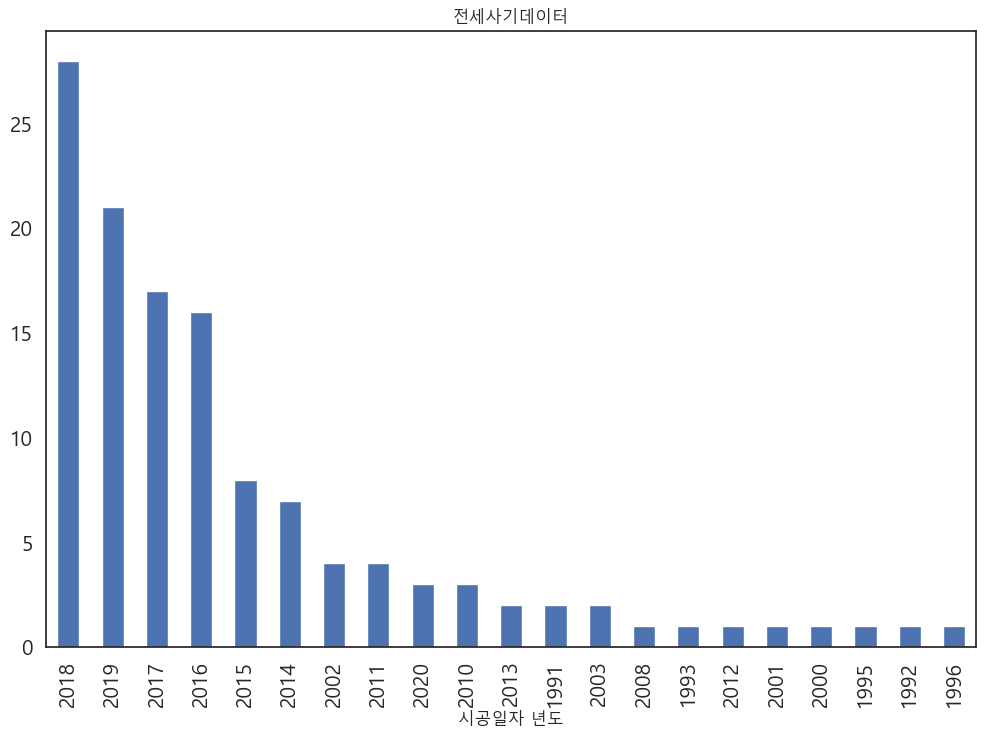

In [81]:
fraudvalue = pd.value_counts(fraud['시공일자_년도'].values, sort=True)
fraudvalue.plot.bar()
fraudvalue.plot.bar(grid=False, figsize=(12,8), fontsize=15)  # 화면 및 폰트 크기 조정
plt.xlabel('시공일자 년도')
plt.title('전세사기데이터')
plt.show()

In [82]:
#2018년, 2019년 데이터가 많은 모습이다.

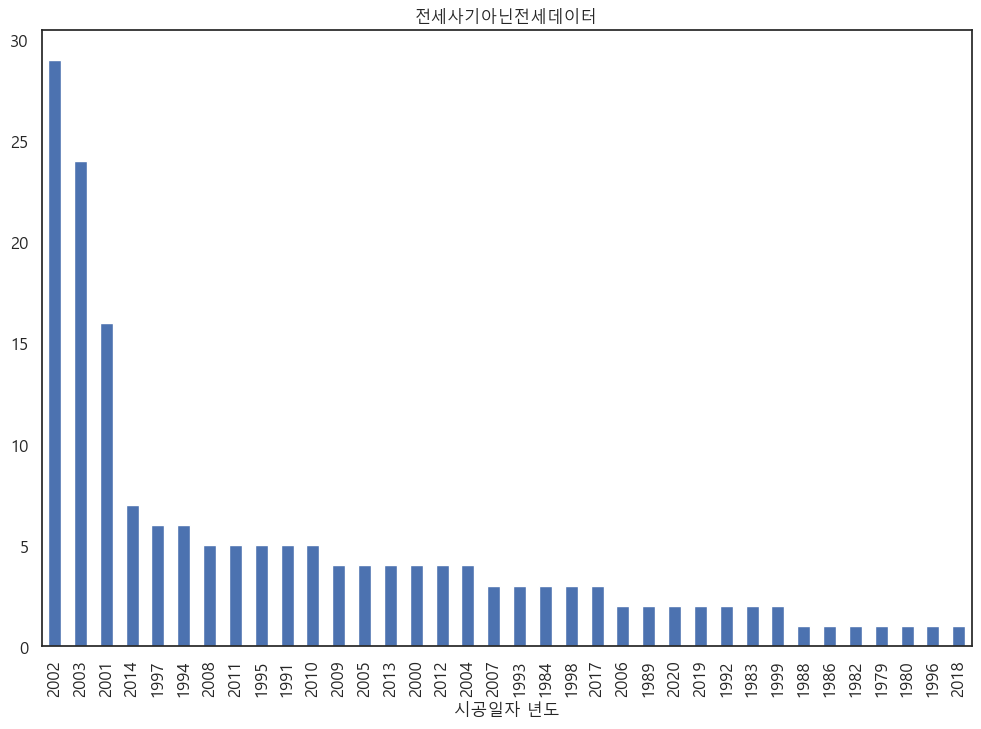

In [83]:
nfraudvalue = pd.value_counts(nfraud['시공일자_년도'].values, sort=True)
nfraudvalue.plot.bar()
nfraudvalue.plot.bar(grid=False, figsize=(12,8), fontsize=12)  # 화면 및 폰트 크기 조정
plt.xlabel('시공일자 년도')
plt.title('전세사기아닌전세데이터')
plt.show()

In [84]:
#2002년, 2003년 데이터가 많은 모습이다.

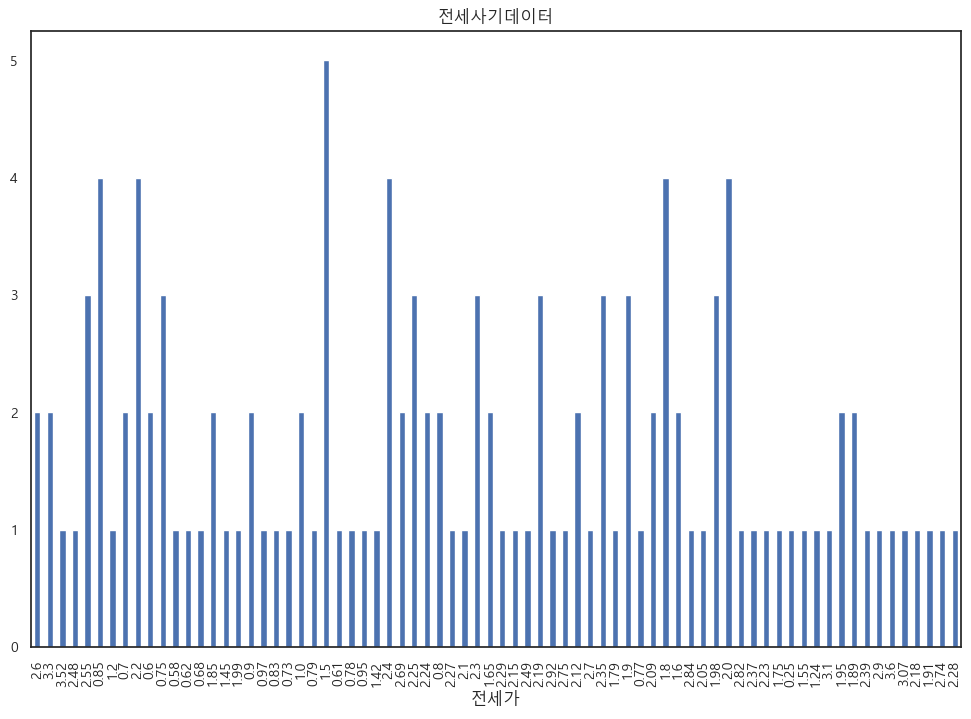

In [85]:
fraudvalue = pd.value_counts(fraud['전세가(억)'].values, sort=False)
fraudvalue.plot.bar()
fraudvalue.plot.bar(grid=False, figsize=(12,8), fontsize=10)  # 화면 및 폰트 크기 조정
plt.xlabel('전세가')
plt.title('전세사기데이터')
plt.show()

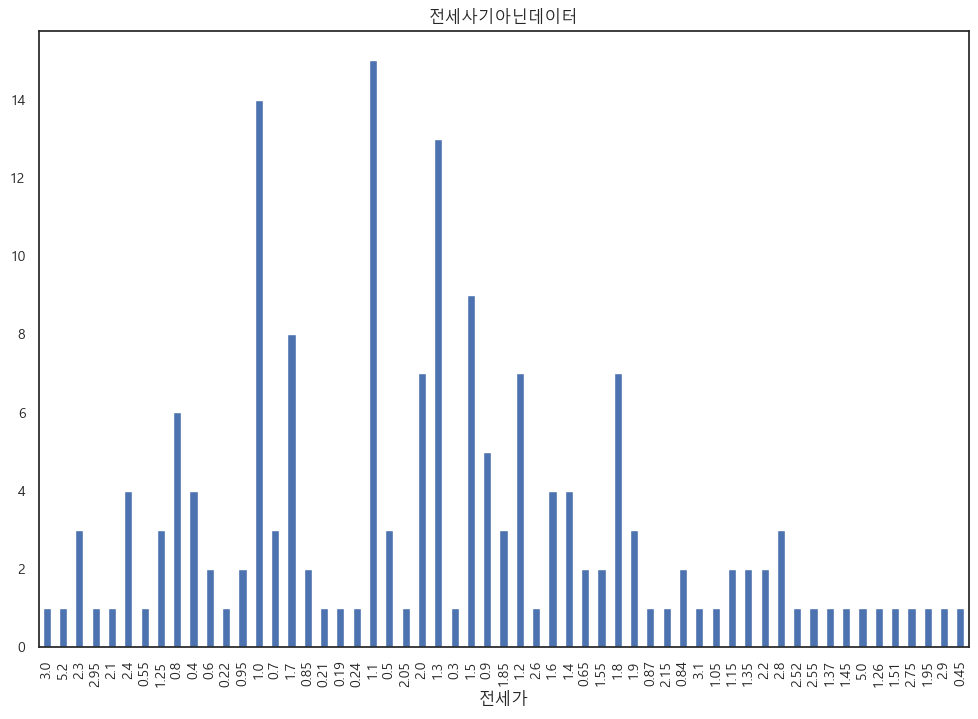

In [81]:
nfraudvalue = pd.value_counts(nfraud['전세가(억)'].values, sort=False)
nfraudvalue.plot.bar()
nfraudvalue.plot.bar(grid=False, figsize=(12,8), fontsize=10)  # 화면 및 폰트 크기 조정
plt.xlabel('전세가')
plt.title('전세사기아닌데이터')
plt.show()

* 전세사기가 아닌 데이터에 비해 사기인 경우에 전세가율 평균이 높다는 사실을 알 수 있다.
* 전세사기의 경우, 가압류라는 키워드가 등기부등본에 있을 확률이 절반가량 되는데 이에 비해 전세사기가 아닌 경우는 가압류라는 키워드가 등본에 있을 확률이 평균적으로 3%정도 된다.
* 신탁도 근소하지만 사기 데이터에 ‘신탁’이라는 키워드가 있을 확률이 조금 더 높았고, 임차권 등기 명령의 경우에도 역시 사기 데이터가 평균적으로 많이 가지고 있을 가능성이 높게 보인다.
* 근저당도 역시 사기 데이터가 사기가 아닌 데이터보다 평균적으로 높게 나왔다.
* 시공일자_년도를 보았을 때, 전세 사기 데이터는 2014년이 평균 시공일자로 나온 반면, 전세사기가 아닌 데이터의 경우 평균 시공일자가 2002년이 나왔다.
제 1분위수, 2분위수, 3분위수를 보아도 데이터 상으로, 최근에 지어진 건물이 전세사기가 일어난 경우가 많다는 것을 볼 수 있다.